In [1]:
using LinearAlgebra　#単位行列のIはLinearAlgebraしたあと！
function calc_HGraphene(Nx,Ny,μ)
    N = Nx*Ny*2
    mat_Htb = zeros(Float64,N,N)   
    mat_Htb = (-μ)*Matrix{Float64}(I, N, N)　#+=にしなくてもok?
    #=対角項に-μを入れておく 単位行列の作り方は Qiita Juliaで数値計算その1 行列の初期化　＆ Julia0.7.0でつまずいたことメモ　参照=#
    t = 1.0
    for ix =1:Nx
        for iy=1:Ny            
            for dx in -1:1
                for dy in -1:1
                    jx = ix + dx
                    
                    jx += ifelse(jx > Nx,-Nx,0)
                    jx += ifelse(jx < 1,Nx,0)
                    
                    jy = iy + dy
                    jy += ifelse(jy > Ny,-Ny,0)
                    jy += ifelse(jy < 1,Ny,0)
                    
 
                    for a=1:2
                        b = ifelse(a ==1,2,1)
                        ii = ((iy-1)*Nx+ix-1)*2+a
                        jj = ((jy-1)*Nx+jx-1)*2+b

                        if dx == 0 && dy == 0
                            mat_Htb[ii,jj] = t   #副格子の自由度aとbにより、dx=0,dy=0であっても対角項ではなくなるのでμではない
                        elseif dx == +1 && dy==0 && a ==1
                            mat_Htb[ii,jj] = t
                        elseif dx == 0 && dy == 1 && a ==1
                            mat_Htb[ii,jj] = t
                        elseif dx == -1 && dy ==0 && a ==2
                            mat_Htb[ii,jj] = t
                        elseif dx ==0 && dy == -1 && a ==2
                            mat_Htb[ii,jj] = t
                        end
                    end
                    

                end
            end
        end
    end
                    
        
    return mat_Htb
end

calc_HGraphene (generic function with 1 method)

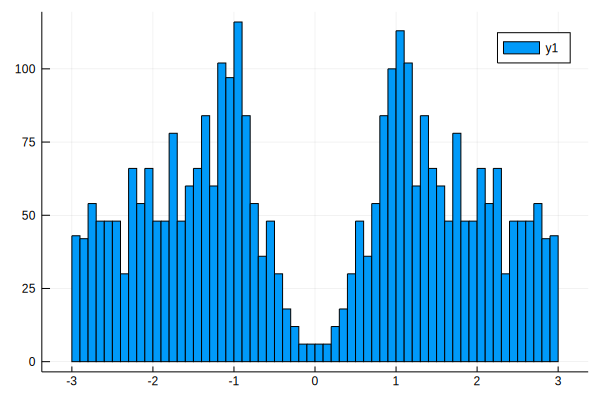

In [2]:
Nx=40
Ny=40
μ=0.0
mat_H=calc_HGraphene(Nx,Ny,μ)
energy,mat_v=eigen(mat_H)
using Plots
histogram(energy,bin=100)

In [37]:
function calc_HGraphenekx(kx,Ny,μ)
    N = Ny*2
    mat_Htb = zeros(ComplexF64,N,N)   
    mat_Htb = (-μ)*Matrix{ComplexF64}(I+0.0im*I, N, N)　#単位行列を複素行列に入れるための応急処置matrix{Float64}(I,N,N)だとエラー
    #mat_Htb = (-μ)*Matrix{Float64}(I, N, N)
    t = 1.0
    for iy=1:Ny            
        for dy in -1:1              
            jy = iy + dy
            jy += ifelse(jy > Ny,-Ny,0)
            jy += ifelse(jy < 1,Ny,0)
                    
            for a=1:2
                b = ifelse(a ==1,2,1)
                ii = (iy-1)*2+a
                jj = (jy-1)*2+b

                if dy == 0 && a == 1
                    mat_Htb[ii,jj] = t+t*exp(im*kx)                        
                elseif dy == 1 && a ==1
                    mat_Htb[ii,jj] = t
                elseif dy ==0 && a ==2
                    mat_Htb[ii,jj] = t+t*exp(-im*kx)
                elseif dy == -1 && a ==2
                    mat_Htb[ii,jj] = t
                end
            end
                    

        end
    end
                    
        
    return mat_Htb
end

calc_HGraphenekx (generic function with 1 method)

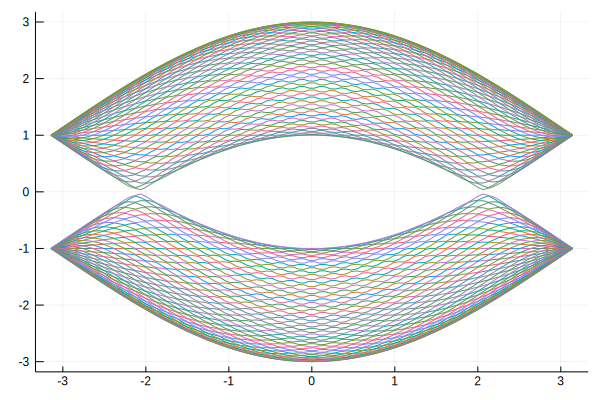

In [53]:
μ=0.0
Ny = 50
nkx = 100
vkx = range(-π,stop=π,length=nkx)
ep = zeros(Float64,nkx,Ny*2)　#波数依存したエネルギーを出力するための実数配列
cnt = 0
for kx in vkx    
    cnt += 1　#kx依存性を入れるための添字
    mat_H = calc_HGraphenekx(kx,Ny,μ)
    energy,mat_v = eigen(mat_H)
    for i=1:Ny*2
        #println(energy[i])
        ep[cnt,i] = energy[i] #エネルギー固有値がkxにも依存しているので各kxごとに配列として保存したい
    end
end
plot(vkx,ep) #plotするときにさきに配列を用意してしまう方法
plot!(legend=false)

In [66]:
function calc_HGraphenekxky(kx,ky,μ)
    N = 2
    mat_Htb = zeros(ComplexF64,N,N)   
    mat_Htb = (-μ)*Matrix{ComplexF64}(I+0.0im*I, N, N)　#単位行列を複素行列に入れるための応急処置matrix{Float64}(I,N,N)だとエラー
    #mat_Htb = (-μ)*Matrix{Float64}(I, N, N)
    t = 1.0
    c = sqrt(3)/2
    #for iy=1:Ny            
        #for dy in -1:1              
         #   jy = iy + dy
          #  jy += ifelse(jy > Ny,-Ny,0)
           # jy += ifelse(jy < 1,Ny,0)
                    
            for a=1:2
                b = ifelse(a ==1,2,1)
                ii = a
                jj = b

                if a == 1
                    mat_Htb[ii,jj] = t+t*exp(im*kx)+t*exp(im*ky*c)   #誤植？+cになっていた                  
               # elseif dy == 1 && a ==1
               #     mat_Htb[ii,jj] = t
                elseif a ==2
                    mat_Htb[ii,jj] = t+t*exp(-im*kx)t*exp(-im*ky*c)
               #elseif dy == -1 && a ==2
                 #   mat_Htb[ii,jj] = t
                end
            end
        #end
    #end
    return mat_Htb
end

calc_HGraphenekxky (generic function with 1 method)

In [67]:
calc_HGraphenekxky(1.0,2.2,μ)

2×2 Array{Complex{Float64},2}:
      -0.0-0.0im       1.21204+1.78606im
 0.0277978-0.234143im     -0.0-0.0im    

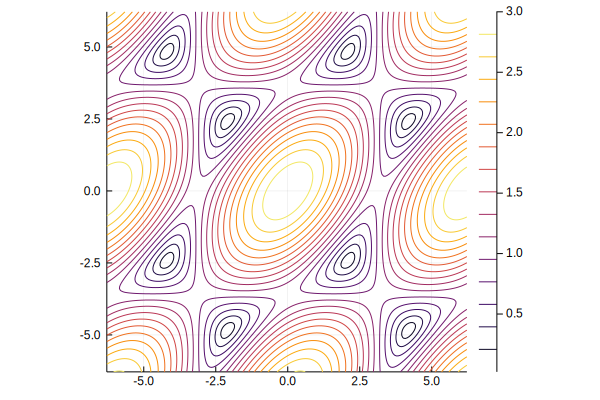

In [58]:
f(kx,ky) = sqrt(3 + 2*cos(kx)+2*cos(ky*sqrt(3)/2) + 2*cos(kx-ky*sqrt(3)/2))

x = -2π:2π/100:2π
y = -2π:2π/100:2π
z = [f(i,j) for i in x, j in y]'
plot(x,y,z)
plot!(aspect_ratio=:equal)

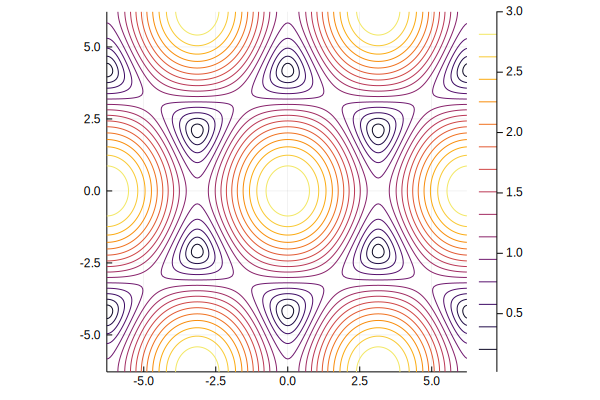

In [59]:
f(kx,ky) = sqrt(3 + 2*cos(kx+ky/2)+2*cos(ky) + 2*cos(kx+ky/2-ky))

x = -2π:2π/100:2π
y = -2π:2π/100:2π
z = [f(i,j) for i in x, j in y]'

plot(x,y,z)
plot!(aspect_ratio=:equal)

In [79]:
function calc_HGraphenekx_w(kx,Ny,μ)
    N = Ny*2
    mat_Htb = zeros(ComplexF64,N,N)   
    mat_Htb = (-μ)*Matrix{ComplexF64}(I+0.0im*I, N, N)　#単位行列を複素行列に入れるための応急処置matrix{Float64}(I,N,N)だとエラー
    #mat_Htb = (-μ)*Matrix{Float64}(I, N, N)
    t = 1.0
    for iy=1:Ny            
        for dy in -1:1              
            jy = iy + dy
            #jy += ifelse(jy > Ny,-Ny,0)
            #jy += ifelse(jy < 1,Ny,0)
                    
            for a=1:2
                b = ifelse(a ==1,2,1)
                ii = (iy-1)*2+a
                jj = (jy-1)*2+b

                if 1 <= jy <= Ny
                    if dy == 0 && a == 1
                        mat_Htb[ii,jj] = t+t*exp(im*kx)                        
                    elseif dy == 1 && a ==1
                        mat_Htb[ii,jj] = t
                    elseif dy ==0 && a ==2
                        mat_Htb[ii,jj] = t+t*exp(-im*kx)
                    elseif dy == -1 && a ==2
                        mat_Htb[ii,jj] = t
                    end
                end
            end
                    

        end
    end
                    
        
    return mat_Htb
end

calc_HGraphenekx_w (generic function with 1 method)

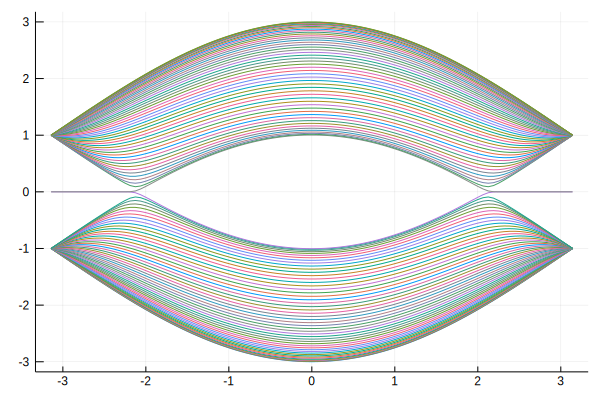

In [81]:
μ=0.0
Ny = 50
nkx = 100
vkx = range(-π,stop=π,length=nkx)
ep = zeros(Float64,nkx,Ny*2)　#波数依存したエネルギーを出力するための実数配列
cnt = 0
for kx in vkx    
    cnt += 1　#kx依存性を入れるための添字
    mat_H = calc_HGraphenekx_w(kx,Ny,μ) #あらゆる波数で対角化
    energy,mat_v = eigen(mat_H)
    for i=1:Ny*2
        #println(energy[i])
        ep[cnt,i] = energy[i] #エネルギー固有値がkxにも依存しているので各kxごとに配列として保存したい
    end
end
plot(vkx,ep) #plotするときにさきに配列を用意してしまう方法
plot!(legend=false)

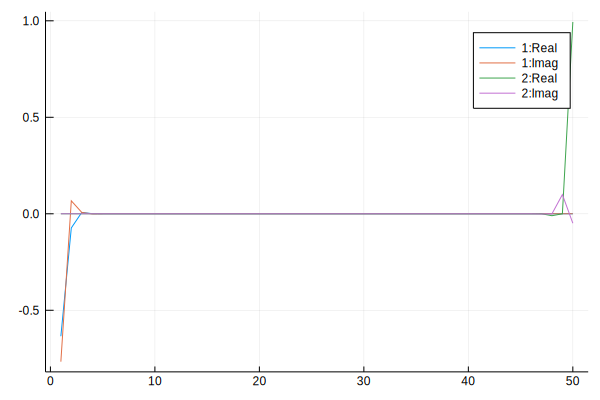

In [84]:
kx = π-0.1
Ny = 50
mat_H = calc_HGraphenekx_w(kx,Ny,μ)
energy,mat_v = eigen(mat_H)
yv = []
ψ1 = []
ψ2 = []
for i in 1:Ny
    push!(yv,i) #配列yvにiを追加
    push!(ψ1,mat_v[2*i,Ny])　
    push!(ψ2,mat_v[2*i-1,Ny+1])
    #=
    y方向の格子点×軌道の自由度2の固有値と固有ベクトルの成分がある。
    2iの固有ベクトルが、±Eのエネルギーの一方の軌道の波動関数の格子点依存性を示す。
    2i-1の固有ベクトルが、±Eのエネルギーのもう一方の軌道の波動関数の格子点依存性を示す。
    エネルギー固有値の低い順から数えてNyとNy+1番目を取り出した。
    これが２つのフラットバンドに対応する。
    =#
end
plot(yv,[real.(ψ1),imag.(ψ1),real.(ψ2),imag.(ψ2)],label=["1:Real","1:Imag","2:Real","2:Imag"])

In [87]:
kx = π-0.1
Ny = 50
mat_H = calc_HGraphenekx_w(kx,Ny,μ)
energy,mat_v = eigen(mat_H)
println(energy)
println(energy[Ny:Ny+1])

[-1.09978, -1.09924, -1.09835, -1.09711, -1.09552, -1.09358, -1.09131, -1.0887, -1.08577, -1.08252, -1.07897, -1.07513, -1.071, -1.0666, -1.06195, -1.05706, -1.05195, -1.04663, -1.04111, -1.03543, -1.0296, -1.02364, -1.01756, -1.0114, -1.00518, -0.998918, -0.992639, -0.986369, -0.980132, -0.973954, -0.967861, -0.96188, -0.956035, -0.950353, -0.94486, -0.939581, -0.934541, -0.929764, -0.925273, -0.92109, -0.917236, -0.913731, -0.910594, -0.90784, -0.905484, -0.903539, -0.902015, -0.900921, -0.900262, -1.55431e-15, 0.0, 0.900262, 0.900921, 0.902015, 0.903539, 0.905484, 0.90784, 0.910594, 0.913731, 0.917236, 0.92109, 0.925273, 0.929764, 0.934541, 0.939581, 0.94486, 0.950353, 0.956035, 0.96188, 0.967861, 0.973954, 0.980132, 0.986369, 0.992639, 0.998918, 1.00518, 1.0114, 1.01756, 1.02364, 1.0296, 1.03543, 1.04111, 1.04663, 1.05195, 1.05706, 1.06195, 1.0666, 1.071, 1.07513, 1.07897, 1.08252, 1.08577, 1.0887, 1.09131, 1.09358, 1.09552, 1.09711, 1.09835, 1.09924, 1.09978]
[-1.55431e-15, 0.0]
